# Lab 3: DATA PREPROCESSING AND REGRESSION

### 1.1 Load data in Pandas.

In [2]:
import pandas as pd

df = pd.read_csv('hepatitis.csv')
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


### 1.2 Drop columns that aren’t useful.

In [3]:
# df.drop(['SkinThickness'], axis=1, inplace = True)
print(df.isnull().mean())

df = df[df.columns[df.isnull().mean() < 0.6]]
df


age                0.000000
sex                0.000000
steroid            0.006452
antivirals         0.000000
fatigue            0.006452
malaise            0.006452
anorexia           0.006452
liver_big          0.064516
liver_firm         0.070968
spleen_palpable    0.032258
spiders            0.032258
ascites            0.032258
varices            0.032258
bilirubin          0.038710
alk_phosphate      0.187097
sgot               0.025806
albumin            0.103226
protime            0.432258
histology          0.000000
class              0.000000
dtype: float64


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


### 1.3 Drop rows with missing values.

In [4]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(155, 20)
(80, 20)


### 1.4 Create dummy variables

In [5]:
dfdummies = pd.get_dummies(df, columns=['sex','steroid','fatigue'])
dfdummies.head()

,age,antivirals,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,...,albumin,protime,histology,class,sex_female,sex_male,steroid_False,steroid_True,fatigue_False,fatigue_True
5,34,False,False,False,True,False,False,False,False,False,...,4.0,75.0,False,live,True,False,False,True,True,False
10,39,True,False,False,False,True,False,False,False,False,...,4.4,85.0,False,live,True,False,True,False,True,False
11,32,True,False,False,True,True,False,True,False,False,...,3.7,54.0,False,live,True,False,False,True,False,True
12,41,True,False,False,True,True,False,False,False,False,...,3.9,52.0,False,live,True,False,False,True,False,True
13,30,False,False,False,True,True,False,False,False,False,...,4.9,78.0,False,live,True,False,False,True,False,True


### 1.5 Take care of missing data

In [6]:
dfna = df.fillna('Missing')

### 1.6 Convert the data frame to NumPy

In [7]:
df_array = df.values
df_array


array([[34, 'female', True, ..., 75.0, False, 'live'],
       [39, 'female', False, ..., 85.0, False, 'live'],
       [32, 'female', True, ..., 54.0, False, 'live'],
       ...,
       [31, 'female', False, ..., 54.0, True, 'live'],
       [53, 'male', False, ..., 48.0, True, 'live'],
       [43, 'female', True, ..., 42.0, True, 'die']], dtype=object)

### 1.7 Divide the data set into training data and test data

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_array, test_size=0.2, random_state=0)

X_train = train_data[:, :-1]
y_train = train_data[:, :-1]

X_test = test_data[:, :-1]
y_test = test_data[:, :-1]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print(x_train, x_test, y_train, y_test)

# x = df.drop(columns=['age'])
# y = df['age']
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

X_train shape: (64, 19)
y_train shape: (64, 19)
X_test shape: (16, 19)
y_test shape: (16, 19)


### 2. Consider the hepatitis/ diabetes csv file, create the regression model display the co-efficients (B0-intercept and B1-Slope), RMSE and predict the response. Plot the graph x v/s y in yellow and x v/s prediction in green.

Intercept (B0): 21.157678085579498
Slope (B1): 0.09721967058087984
Root Mean Squared Error: 12.385641692256364


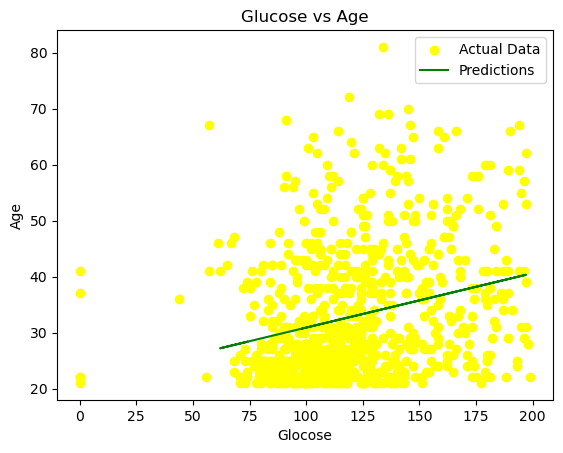

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('diabetes.csv')
# print(df)
x = df['Glucose'].values.reshape(-1, 1)
y = df['Age']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

intercept = model.intercept_
slope = model.coef_[0]
print("Intercept (B0):", intercept)
print("Slope (B1):", slope)

y_pred = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

plt.scatter(x, y, color='yellow', label='Actual Data')
plt.plot(x_test, y_pred, color='green', label='Predictions')
plt.xlabel('Glocose')
plt.ylabel('Age')
plt.title('Glucose vs Age')
plt.legend()
plt.show()

used_columns = ['Glucose', 'Age']
used_df = df[used_columns]
used_df.to_csv('new_csv_210962158.csv', index=False)

## Additional

Construct a training data of CSV file with attributes(Study-time in hours of ML lab course (x), Score out of 10 (y)) of 10 rows. Create the regression model display the co-efficients (B0-intercept and B1-Slope), RMSE and predict the response. Plot the graph x v/s y in red and x v/s prediction in blue. Test your model to predict score obtained when study time of a student is 10 hours.

B0 (intercept): 2.4199999999999973
B1 (slope): 0.8236363636363642
Root Mean Squared Error (RMSE): 0.7693444671217887


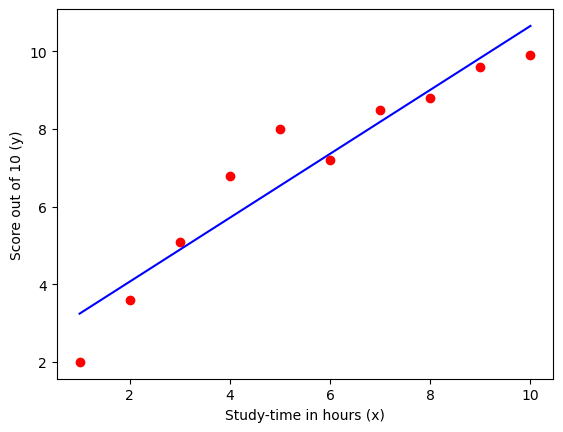

The predicted score for a student studying 10 hours is: 10.65636363636364


/Users/ankitkumar/miniforge3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import math

data = {'Study-time in hours (x)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Score out of 10 (y)': [2, 3.6, 5.1, 6.8, 8, 7.2, 8.5, 8.8, 9.6, 9.9]}
df = pd.DataFrame(data)

X = df[['Study-time in hours (x)']]
y = df['Score out of 10 (y)']

model = LinearRegression()

model.fit(X, y)

B0 = model.intercept_
B1 = model.coef_[0]
print("B0 (intercept):", B0)
print("B1 (slope):", B1)

predictions = model.predict(X)

rmse = math.sqrt(mean_squared_error(y, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

plt.scatter(X, y, color='red')
plt.plot(X, predictions, color='blue')
plt.xlabel('Study-time in hours (x)')
plt.ylabel('Score out of 10 (y)')
plt.show()

predicted_score = model.predict([[10]])
print(f"The predicted score for a student studying 10 hours is: {predicted_score[0]}")